# Proyecto Corte 1 con metodología CRISP-DM

In [48]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt

## 1. Comprensión del negocio
¿Cómo varía la popularidad según año de lanzamiento en varias plataformas (Spotify y YouTube)?

**Objetivo general:** Entender como ha cambiado la popularidad de las canciones lanzadas en Spotify y Youtube a lo largo de los años para identificar patrones que influyan en el exito de futuros lanzamientos.

**Preguntas especificas:**
- ¿Qué años han tenido más streams o vistas en ambas plataformas?
- ¿Hay alguna tendecia que indique que la popularidad de las canciones en cada plataforma ha estado aumentado o disminuyendo con el tiempo?
- ¿Que plataforma tiene una mayor popularidad?

## 2. Comprensión de los datos
Importar el dataset como un dataframe y explorar el estado inicial de los datos. Muestra información general y las primeras filas de la tabla.

In [49]:
#se carga el archivo csv
archivo = r"Datos_proyecto_C1_Spotify_Youtube.csv"

#se define el data frame
df = pd.read_csv(archivo)

#print de las primeras rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08


## 3. Preparación de los datos
Limpieza, integración,transformación, reducción de ruido, selección, división, creación de nuevas variables y extracción de información adicional.

In [50]:
# Eliminar duplicados basados en artista + track
df = df.drop_duplicates(subset=["Artist", "Track"])

# Eliminar registros sin métricas de popularidad (Streams y Views nulos)
df = df.dropna(subset=["Stream", "Views"])

# Asegurar tipos numéricos correctos
for col in ["Stream", "Views", "Likes", "Comments"]:
    df[col] = pd.to_numeric(df[col], errors="coerce")


# Normalización logarítmica para métricas de popularidad
df["Stream_log"] = np.log1p(df["Stream"])
df["Views_log"] = np.log1p(df["Views"])
df["Likes_log"] = np.log1p(df["Likes"].fillna(0))
df["Comments_log"] = np.log1p(df["Comments"].fillna(0))

# Eliminar outliers extremos (Streams > 5e9 o Views > 1e10)
df = df[(df["Stream"] < 5e9) & (df["Views"] < 1e10)]

df_reduced = df[[
    "Artist", "Track", "Album",
    "Stream", "Views", "Likes", "Comments",
    "Stream_log", "Views_log", "Likes_log", "Comments_log"
]].copy()


#### División de datos y muestra del tamaño de los nuevos dataframes:

In [51]:
# Spotify subset
df_spotify = df_reduced[["Artist", "Track", "Album", "Stream", "Stream_log"]].copy()

# YouTube subset
df_youtube = df_reduced[[
    "Artist", "Track", "Album",
    "Views", "Likes", "Comments",
    "Views_log", "Likes_log", "Comments_log"
]].copy()

# Resultados
print("Dataset limpio y reducido:", df_reduced.shape)
print("Subset Spotify:", df_spotify.shape)
print("Subset YouTube:", df_youtube.shape)

Dataset limpio y reducido: (19614, 11)
Subset Spotify: (19614, 5)
Subset YouTube: (19614, 9)


#### Muestra de las primeras columnas de los tres nuevos dataframes:

In [52]:
df_reduced.head()

,Artist,Track,Album,Stream,Views,Likes,Comments,Stream_log,Views_log,Likes_log,Comments_log
0,Gorillaz,Feel Good Inc.,Demon Days,1.040235e+09,693555221.0,6220896.0,169907.0,20.762712,20.357341,15.643425,12.043012
1,Gorillaz,Rhinestone Eyes,Plastic Beach,3.100837e+08,72011645.0,1079128.0,31003.0,19.552353,18.092338,13.891665,10.341872
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07,8435055.0,282142.0,7399.0,17.959652,15.947907,12.550169,8.909235
3,Gorillaz,On Melancholy Hill,Plastic Beach,4.346636e+08,211754952.0,1788577.0,55229.0,19.890083,19.170940,14.396931,10.919262
4,Gorillaz,Clint Eastwood,Gorillaz,6.172597e+08,618480958.0,6197318.0,155930.0,20.240800,20.242777,15.639627,11.957169


In [53]:
df_spotify.head()

,Artist,Track,Album,Stream,Stream_log
0,Gorillaz,Feel Good Inc.,Demon Days,1.040235e+09,20.762712
1,Gorillaz,Rhinestone Eyes,Plastic Beach,3.100837e+08,19.552353
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07,17.959652
3,Gorillaz,On Melancholy Hill,Plastic Beach,4.346636e+08,19.890083
4,Gorillaz,Clint Eastwood,Gorillaz,6.172597e+08,20.240800


In [54]:
df_youtube.head()

,Artist,Track,Album,Views,Likes,Comments,Views_log,Likes_log,Comments_log
0,Gorillaz,Feel Good Inc.,Demon Days,693555221.0,6220896.0,169907.0,20.357341,15.643425,12.043012
1,Gorillaz,Rhinestone Eyes,Plastic Beach,72011645.0,1079128.0,31003.0,18.092338,13.891665,10.341872
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),8435055.0,282142.0,7399.0,15.947907,12.550169,8.909235
3,Gorillaz,On Melancholy Hill,Plastic Beach,211754952.0,1788577.0,55229.0,19.170940,14.396931,10.919262
4,Gorillaz,Clint Eastwood,Gorillaz,618480958.0,6197318.0,155930.0,20.242777,15.639627,11.957169


#### Creación de una nueva columna Year:
Se extrae el año de lanzamiento de cada canción a partir de otras columnas como "Album" o "Track" y muestra las primeras filas del df_reduced ya con la columna añadida.

In [55]:
# ==============================
# FUNCIONES AUXILIARES
# ==============================
def extract_year(text):
    """Extrae un año en formato 19xx o 20xx de un texto."""
    if pd.isna(text):
        return None
    match = re.search(r"(19[5-9][0-9]|20[0-2][0-9])", str(text))
    if match:
        return int(match.group(0))
    return None

# ==============================
# EXTRAER AÑOS
# ==============================

# Año desde Spotify (principalmente en Album o Track)
df["Year_spotify"] = df["Album"].apply(extract_year)
df.loc[df["Year_spotify"].isna(), "Year_spotify"] = df["Track"].apply(extract_year)

# Año desde YouTube (Title o Description)
df["Year_youtube"] = df["Title"].apply(extract_year)
df.loc[df["Year_youtube"].isna(), "Year_youtube"] = df["Description"].apply(extract_year)

# ==============================
# CREAR COLUMNA FINAL YEAR
# ==============================
def choose_year(row):
    if pd.notna(row["Year_spotify"]) and pd.notna(row["Year_youtube"]):
        # Si coinciden, usar ese año
        if row["Year_spotify"] == row["Year_youtube"]:
            return row["Year_spotify"]
        else:
            # Si difieren, damos prioridad a Spotify
            return row["Year_spotify"]
    elif pd.notna(row["Year_spotify"]):
        return row["Year_spotify"]
    elif pd.notna(row["Year_youtube"]):
        return row["Year_youtube"]
    else:
        return None

# Copiar columnas auxiliares
df_reduced["Year_spotify"] = df["Year_spotify"]
df_reduced["Year_youtube"] = df["Year_youtube"]

# Crear columna final Year
df_reduced["Year"] = df.apply(choose_year, axis=1)

# ==============================
# RESULTADO
# ==============================
df_reduced.head()


,Artist,Track,Album,Stream,Views,Likes,Comments,Stream_log,Views_log,Likes_log,Comments_log,Year_spotify,Year_youtube,Year
0,Gorillaz,Feel Good Inc.,Demon Days,1.040235e+09,693555221.0,6220896.0,169907.0,20.762712,20.357341,15.643425,12.043012,NaN,NaN,NaN
1,Gorillaz,Rhinestone Eyes,Plastic Beach,3.100837e+08,72011645.0,1079128.0,31003.0,19.552353,18.092338,13.891665,10.341872,NaN,2010.0,2010.0
2,Gorillaz,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),6.306347e+07,8435055.0,282142.0,7399.0,17.959652,15.947907,12.550169,8.909235,NaN,NaN,NaN
3,Gorillaz,On Melancholy Hill,Plastic Beach,4.346636e+08,211754952.0,1788577.0,55229.0,19.890083,19.170940,14.396931,10.919262,NaN,2010.0,2010.0
4,Gorillaz,Clint Eastwood,Gorillaz,6.172597e+08,618480958.0,6197318.0,155930.0,20.240800,20.242777,15.639627,11.957169,NaN,2001.0,2001.0


### 2. Comprensión de los datos
Aquí hay una pequeña iteración, ya que después de limpiar y extraer nuevos datos, es necesario explorar el nuevo dataframe (en este caso, agrupando la cantidad de reproducciones por año y con EDA).

In [56]:
# ==============================
# AGRUPAR POR AÑO
# ==============================
# Spotify
spotify_yearly = df_reduced.groupby("Year")["Stream_log"].mean()

# YouTube
youtube_yearly = df_reduced.groupby("Year")["Views_log"].mean()

In [ ]:
# ==============================
# EDA
# ==============================

## 4. Modelado

In [ ]:
# ========================================
# Regrasión lineal para ambas plataformas
# ========================================

## 5. Evaluación

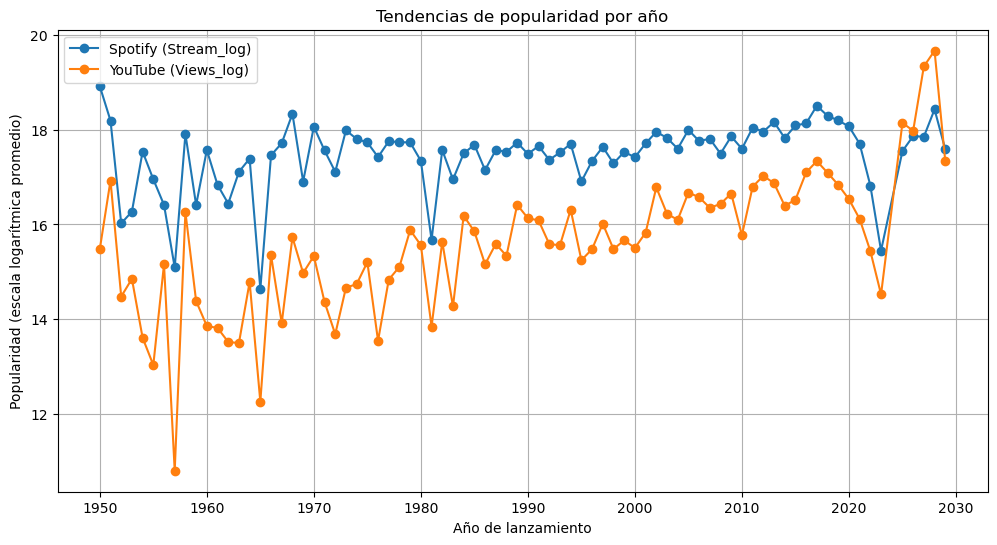

In [57]:

# ==============================
# GRAFICAR TENDENCIAS
# ==============================
plt.figure(figsize=(12,6))
plt.plot(spotify_yearly.index, spotify_yearly.values, marker="o", label="Spotify (Stream_log)")
plt.plot(youtube_yearly.index, youtube_yearly.values, marker="o", label="YouTube (Views_log)")

plt.title("Tendencias de popularidad por año")
plt.xlabel("Año de lanzamiento")
plt.ylabel("Popularidad (escala logarítmica promedio)")
plt.legend()
plt.grid(True)
plt.show()
